# Statistics in Python

## Imports

In [5]:
import pandas as ps
import numpy as np
from pandas import plotting
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels as sm
import seaborn
from matplotlib import pyplot as plt

In [3]:
data = ps.read_csv('brain_size.csv', sep=';', na_values=".")

## Data Set

In [3]:
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


## Creating an array

In [4]:
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [5]:
ps.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


## Manipulating Data

In [6]:
data.shape

(40, 8)

In [7]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

## Columns can be addressed by name

In [8]:
print(data['Gender'])

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


## Simple selector

In [9]:
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

## Groupby is splitting a dataframe on values of categorical variables

In [10]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [11]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


## Plotting Data

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

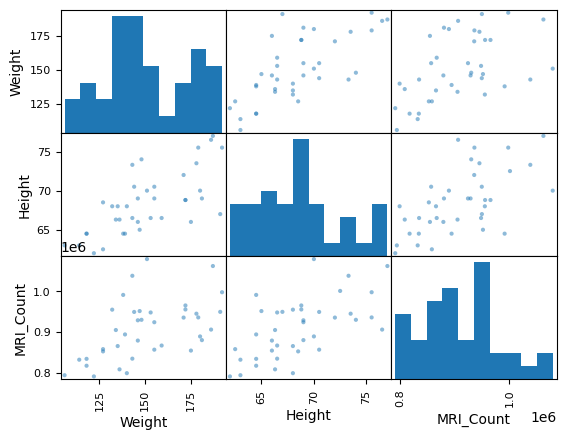

In [12]:
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

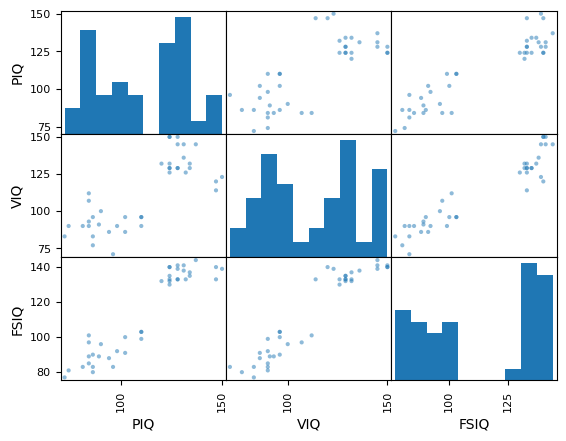

In [13]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

## Hypothesis Testing

### 1 Sample t-test

In [14]:
stats.ttest_1samp(data['VIQ'], 0)   

TtestResult(statistic=30.08809997084933, pvalue=1.3289196468727879e-28, df=39)

### 2 Sample t-test

In [15]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq) 

TtestResult(statistic=-0.7726161723275012, pvalue=0.44452876778583217, df=38.0)

### Paired Tests

In [16]:
stats.ttest_ind(data['FSIQ'], data['PIQ']) 

TtestResult(statistic=0.465637596380964, pvalue=0.6427725009414841, df=78.0)

In [17]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])   

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

### This is equivalent to a 1 sample test on the difference

In [18]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

### We can use a Wilcoxon signed-rank test

In [19]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])  

/srv/conda/envs/notebook/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

### For Mann-Whitney U test use

In [20]:
stats.mannwhitneyu(data['FSIQ'], data['PIQ']) 

MannwhitneyuResult(statistic=905.0, pvalue=0.3143162646412675)

## Simple Linear Regression

### Test hypothesis that y = x * coef + intercept + e

In [21]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)

### Normal distrubuted noise

In [22]:
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

### Create a data frame containing all the relevant variables

In [23]:
data = ps.DataFrame({'x': x, 'y': y})

### Specify an OLS model and fit it

In [24]:
model = ols("y ~ x", data).fit()

In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           8.56e-08
Time:                        19:04:32   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

## Categorical variables: comparing groups or multiple categories

In [26]:
data = ps.read_csv('brain_size.csv', sep=';', na_values=".")

### comparison between IQ of male and female using a linear model

In [27]:
model = ols("VIQ ~ Gender + 1", data) .fit()

In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 13 Jul 2023   Prob (F-statistic):              0.445
Time:                        19:04:34   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

### Integer column can be forced to be treated as a categorical using

In [29]:
model = ols('VIQ ~ C(Gender)', data).fit()

### Link to t-tests between different FSIQ and PIQ

In [30]:
data_fisq = ps.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})

In [31]:
data_piq = ps.DataFrame({'iq': data['PIQ'], 'type': 'piq'})

In [32]:
data_long = ps.concat((data_fisq, data_piq))

In [33]:
print(data_long)

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


In [34]:
model = ols("iq ~ type", data_long).fit()

In [35]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Thu, 13 Jul 2023   Prob (F-statistic):              0.643
Time:                        19:04:37   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

### We can retrieve the same values fro t-test and corresponding p-values for the effect of the type of iq than the previous t-test

In [36]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=0.465637596380964, pvalue=0.6427725009414841, df=78.0)

## Multiple Regression: including multiple factors

### Download iris.csv 

In [37]:
data = ps.read_csv('iris.csv')

In [38]:
model = ols('sepal_width ~ name + petal_length', data).fit ()

In [39]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.58e-20
Time:                        19:04:39   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

## Post-hoc hypothesis testing: analysis of variance (ANOVA)

In [40]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=3.2453353465741173, p=0.07369058781701415, df_denom=146, df_num=1>


In [44]:
data = ps.read_csv('wages.csv')

## More visualization: Seaborn for statistical exploration

In [45]:
print(data)

     EDUCATION  SOUTH  SEX  EXPERIENCE  UNION   WAGE  AGE  RACE  COL1  COL2  \
0            8      0    1          21      0   5.10   35     2     6     1   
1            9      0    1          42      0   4.95   57     3     6     1   
2           12      0    0           1      0   6.67   19     3     6     1   
3           12      0    0           4      0   4.00   22     3     6     0   
4           12      0    0          17      0   7.50   35     3     6     0   
..         ...    ...  ...         ...    ...    ...  ...   ...   ...   ...   
529         18      0    0           5      0  11.36   29     3     5     0   
530         12      0    1          33      0   6.10   51     1     5     0   
531         17      0    1          25      1  23.25   48     1     5     0   
532         12      1    0          13      1  19.88   31     3     5     0   
533         16      0    0          33      0  15.38   55     3     5     1   

     COL3  
0       1  
1       1  
2       0  
3  

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


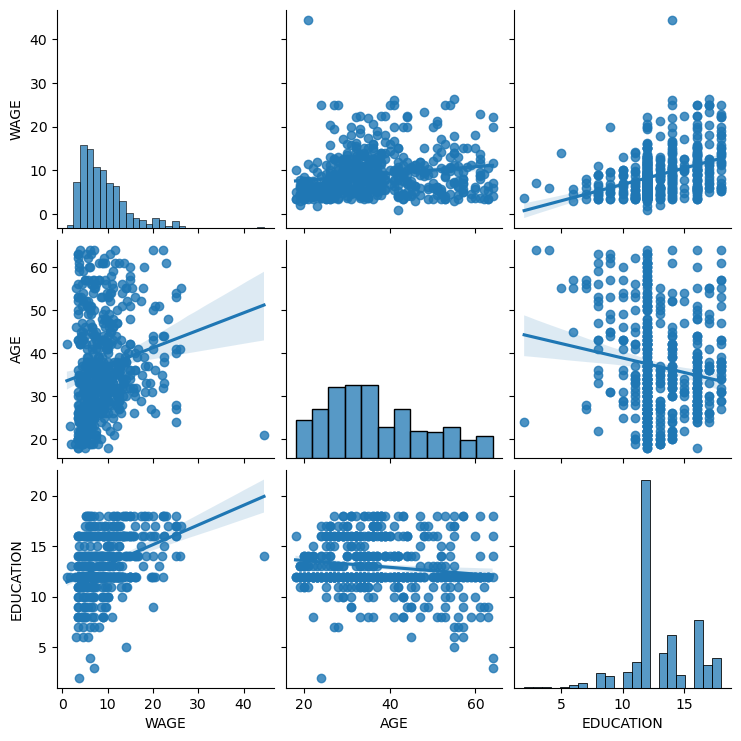

In [47]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg')

### categorical variables can be plotted as the hue

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


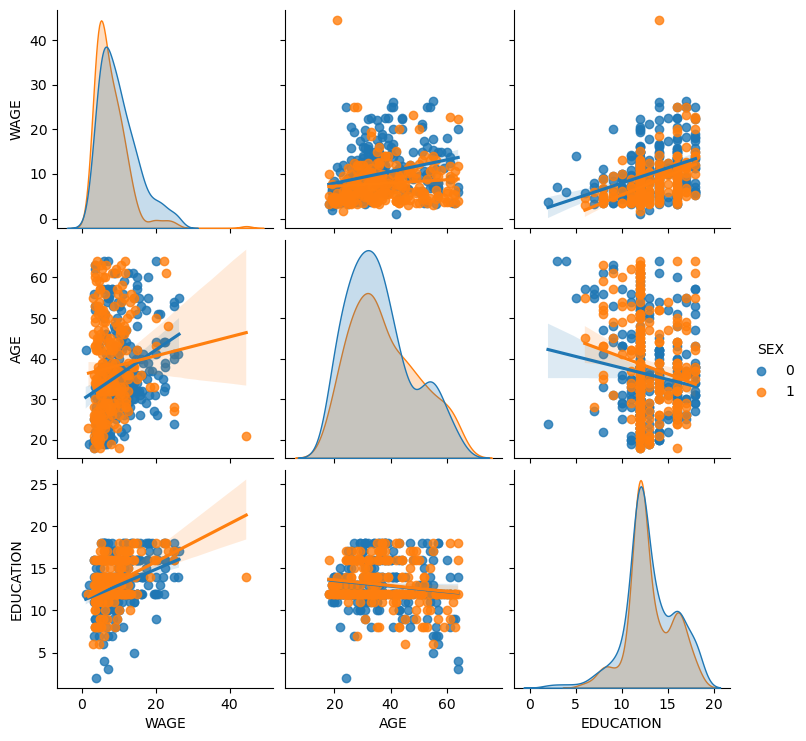

In [48]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='SEX')

## Look and feel and matplotlib settings

In [50]:
plt.rcdefaults()

## Implot: plotting a univariate regression

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


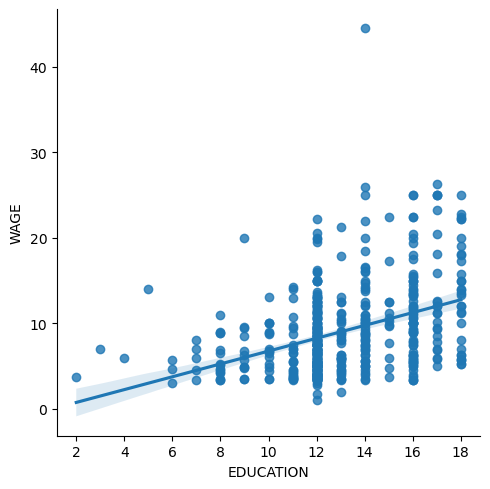

In [52]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)